In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("ages_dataset.csv")
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Coordinates (Lat/Lon),Associated Country Life Expectancy
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]"
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,['United Kingdom'],"[(55.378051, -3.435973)]",[81.3]
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,['United States'],"[(37.09024, -95.712891)]",[78.5]
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,['Austria'],"[(47.516231, 14.550072)]",[81.6]
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,"['Austria', 'Italy']","[(47.516231, 14.550072), (41.87194, 12.56738)]","[81.6, 82.9]"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 13 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   Id                                        1223009 non-null  object 
 1   Name                                      1223009 non-null  object 
 2   Short description                         1155109 non-null  object 
 3   Gender                                    1089363 non-null  object 
 4   Country                                   887500 non-null   object 
 5   Occupation                                1016095 non-null  object 
 6   Birth year                                1223009 non-null  int64  
 7   Death year                                1223008 non-null  float64
 8   Manner of death                           53603 non-null    object 
 9   Age of death                              1223008 non-null  float64
 10  Associ

* 1,223,009 data entries
* 13 columns/attributes
* Null value counts can be derived from the information above.
* "Manner of death" contains the least values

In [6]:
#Print number of unique values of each column
print("\nSize of each variation of categories:")
for column in df:
    print(column + ":", df[column].unique().size)


Size of each variation of categories:
Id: 1222997
Name: 1130871
Short description: 512440
Gender: 21
Country: 5962
Occupation: 9314
Birth year: 2173
Death year: 2254
Manner of death: 207
Age of death: 131
Associated Countries: 1900
Associated Country Coordinates (Lat/Lon): 1900
Associated Country Life Expectancy: 1619


## Preprocessing

Data entries with birth dates prior to the 1500 are to be discarded as reliable record keeping practices were not in place, resulting in a bias to the recording of successful, famous or wealthy individuals lives introduces an unacceptable amount of noise to the data. The lives of the exceptional do not represent the general population.

#### Normalise Formats

In [7]:
df.dtypes

Id                                           object
Name                                         object
Short description                            object
Gender                                       object
Country                                      object
Occupation                                   object
Birth year                                    int64
Death year                                  float64
Manner of death                              object
Age of death                                float64
Associated Countries                         object
Associated Country Coordinates (Lat/Lon)     object
Associated Country Life Expectancy           object
dtype: object

In [8]:
df.head(1)

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Coordinates (Lat/Lon),Associated Country Life Expectancy
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]"


In [32]:
#fill empty values with 0 to convert data type
df["Death year"] = df["Death year"].fillna(0)
df["Age of death"] = df["Age of death"].fillna(0)
#convert numerical values to int32
df["Death year"] = df["Death year"].astype('int32')
df["Birth year"] = df["Birth year"].astype('int32')
df["Age of death"] = df["Age of death"].astype('int32')
df.dtypes

Id                                          object
Name                                        object
Short description                           object
Gender                                      object
Country                                     object
Occupation                                  object
Birth year                                   int32
Death year                                   int32
Manner of death                             object
Age of death                                 int32
Associated Countries                        object
Associated Country Coordinates (Lat/Lon)    object
Associated Country Life Expectancy          object
Birth Century                                int32
dtype: object

In [33]:
#Convert string categorical data to all lowercase
df["Name"] = df["Name"].str.lower()
df["Short description"] = df["Short description"].str.lower()
df["Gender"] = df["Gender"].str.lower()
df["Country"] = df["Country"].str.lower()
df["Occupation"] = df["Occupation"].str.lower()
df["Manner of death"] = df["Manner of death"].str.lower()

#### Remove duplicates

In [34]:
print("Dataframe duplicates: ", df.duplicated().sum())

for column in df:
    print(column, "duplicates: ", df[column].duplicated().sum())

Dataframe duplicates:  0
Id duplicates:  0
Name duplicates:  92359
Short description duplicates:  715039
Gender duplicates:  1222976
Country duplicates:  1217035
Occupation duplicates:  1213683
Birth year duplicates:  1220824
Death year duplicates:  1220743
Manner of death duplicates:  1222790
Age of death duplicates:  1222867
Associated Countries duplicates:  1221097
Associated Country Coordinates (Lat/Lon) duplicates:  1221097
Associated Country Life Expectancy duplicates:  1221378
Birth Century duplicates:  1222956


There is an issue with duplicates where there are duplicates of famous figures, which we can be (somewhat) certain are the same entry, however we can not remove all duplicated because many people have the same name in general. only removing duplicates with the same birth and death year is one possible but incomplete solution.

In [45]:
# Find duplicate entries based on 'Name', 'Birth year', and 'Death year'
duplicates = df[df.duplicated(subset=['Name', 'Birth year', 'Death year'], keep=False)]

duplicate_list = duplicates['Name'].unique().tolist()
print(duplicate_list)


['anne anderson', 'wilhelm zoepf', 'imre máthé', 'johann adam von bicken', 'hugo ruf', 'wilhelm busch', 'friedrich goll', 'wilhelm florin', 'karl fabritius', 'pietro colonna', 'françois dubois', 'david robertson', 'anthony rolfe johnson', 'john gordon', 'victor jules levasseur', 'john brown', 'john gorrie', 'john fearn', 'johannes banfi hunyades', 'józsef durguth', 'györgy jakusics', 'gyula kadocsa', 'ferenc lajcsák', 'david august rosenthal', 'joseph hansen', 'andrás pál', 'karl eckermann', 'john bell', 'ernst gerber', 'louis seel', 'friedrich meyer', 'george wang', 'hans schwarz van berk', 'hugo rühle von lilienstern', 'john prendergast vereker', 'john william dawson', 'joão batista mascarenhas de morais', 'paul franke', 'stan king', 'giuseppe crivelli', 'harold ingrams', 'wolfgang hoffmann', 'hendrik dirk stephaan hasselman', 'hans wagner', 'don coleman', 'giovanni luigi pavarino', 'francisco santos', 'johannes ryhiner', "jules d'udekem", 'nicolas bousmard', 'lars berg', 'tito gómez

In [44]:
# Find duplicate names
duplicate_names = df[df.duplicated(subset=['Name'], keep=False)]

# Get the list of duplicate names
duplicate_names_list = duplicate_names['Name'].unique().tolist()
print(duplicate_names_list)

# Get the list of duplicate names with a count of how many times they appear
duplicate_names_count = duplicate_names['Name'].value_counts()
print(duplicate_names_count)


['george washington', 'douglas adams', 'abraham lincoln', 'ludwig van beethoven', 'victor hugo', 'giuseppe garibaldi', 'jean moulin', 'william shakespeare', 'pierre corneille', 'roald amundsen', 'isaac newton', 'charles darwin', 'john lennon', 'josé joaquín pérez', 'ramón freire', 'johann sebastian bach', 'niccolò machiavelli', 'giovanni boccaccio', 'richard wagner', 'neil armstrong', 'barbara', 'giuseppe farina', 'charles de gaulle', 'hans schmidt', 'willy brandt', 'helmut schmidt', 'helmut kohl', 'george harrison', 'friedrich ebert', 'john franklin', 'michael jackson', 'graham hill', 'jim clark', 'john surtees', 'david cairns', 'john gregg', 'charles martel', 'james coburn', 'mary stewart', 'paul otto', 'manfred von richthofen', 'john hamilton', 'marcus ravenswaaij', 'birger kildal', 'charles lyell', 'gilles de paris', 'luigi bailo', 'vincent van gogh', 'adolphe thiers', 'james brown', 'jean-jacques rousseau', 'alexander von humboldt', 'wilhelm grimm', 'james joyce', 'li bai', 'anton

In [11]:
df.drop_duplicates(subset=["Id"], inplace=True)

print("Dataframe duplicates: ", df.duplicated().sum())

for column in df:
    print(column, "duplicates: ", df[column].duplicated().sum())

Dataframe duplicates:  0
Id duplicates:  0
Name duplicates:  92126
Short description duplicates:  710561
Gender duplicates:  1222976
Country duplicates:  1217035
Occupation duplicates:  1213683
Birth year duplicates:  1220824
Death year duplicates:  1220743
Manner of death duplicates:  1222790
Age of death duplicates:  1222867
Associated Countries duplicates:  1221097
Associated Country Coordinates (Lat/Lon) duplicates:  1221097
Associated Country Life Expectancy duplicates:  1221378


#### Remove Redundant Columns

## Visualisation

Text(0, 0.5, 'Number of People')

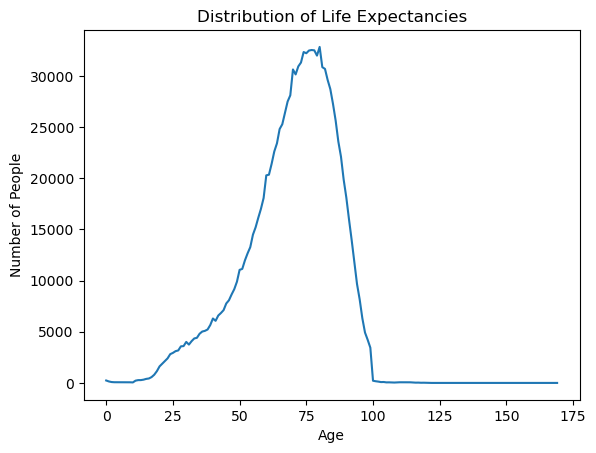

In [12]:
plt.title("Distribution of Life Expectancies")
plt.plot(df["Age of death"].value_counts().sort_index())
plt.xlabel("Age")
plt.ylabel("Number of People")

In [13]:
df["Age of death"][df["Country"] == "Australia"].value_counts().sort_index()

0      1
1      1
6      1
8      1
11     1
      ..
103    2
106    1
112    1
113    3
115    1
Name: Age of death, Length: 99, dtype: int64

Text(0, 0.5, 'Number of People')

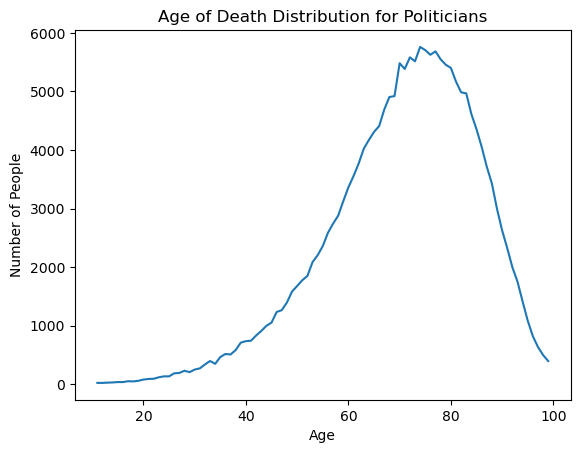

In [14]:
plt.title("Age of Death Distribution for Politicians")
plt.plot(df["Age of death"][df["Occupation"] == "Politician"].value_counts().sort_index())
plt.xlabel("Age")
plt.ylabel("Number of People")

In [15]:
df['Occupation'].unique().size

9314

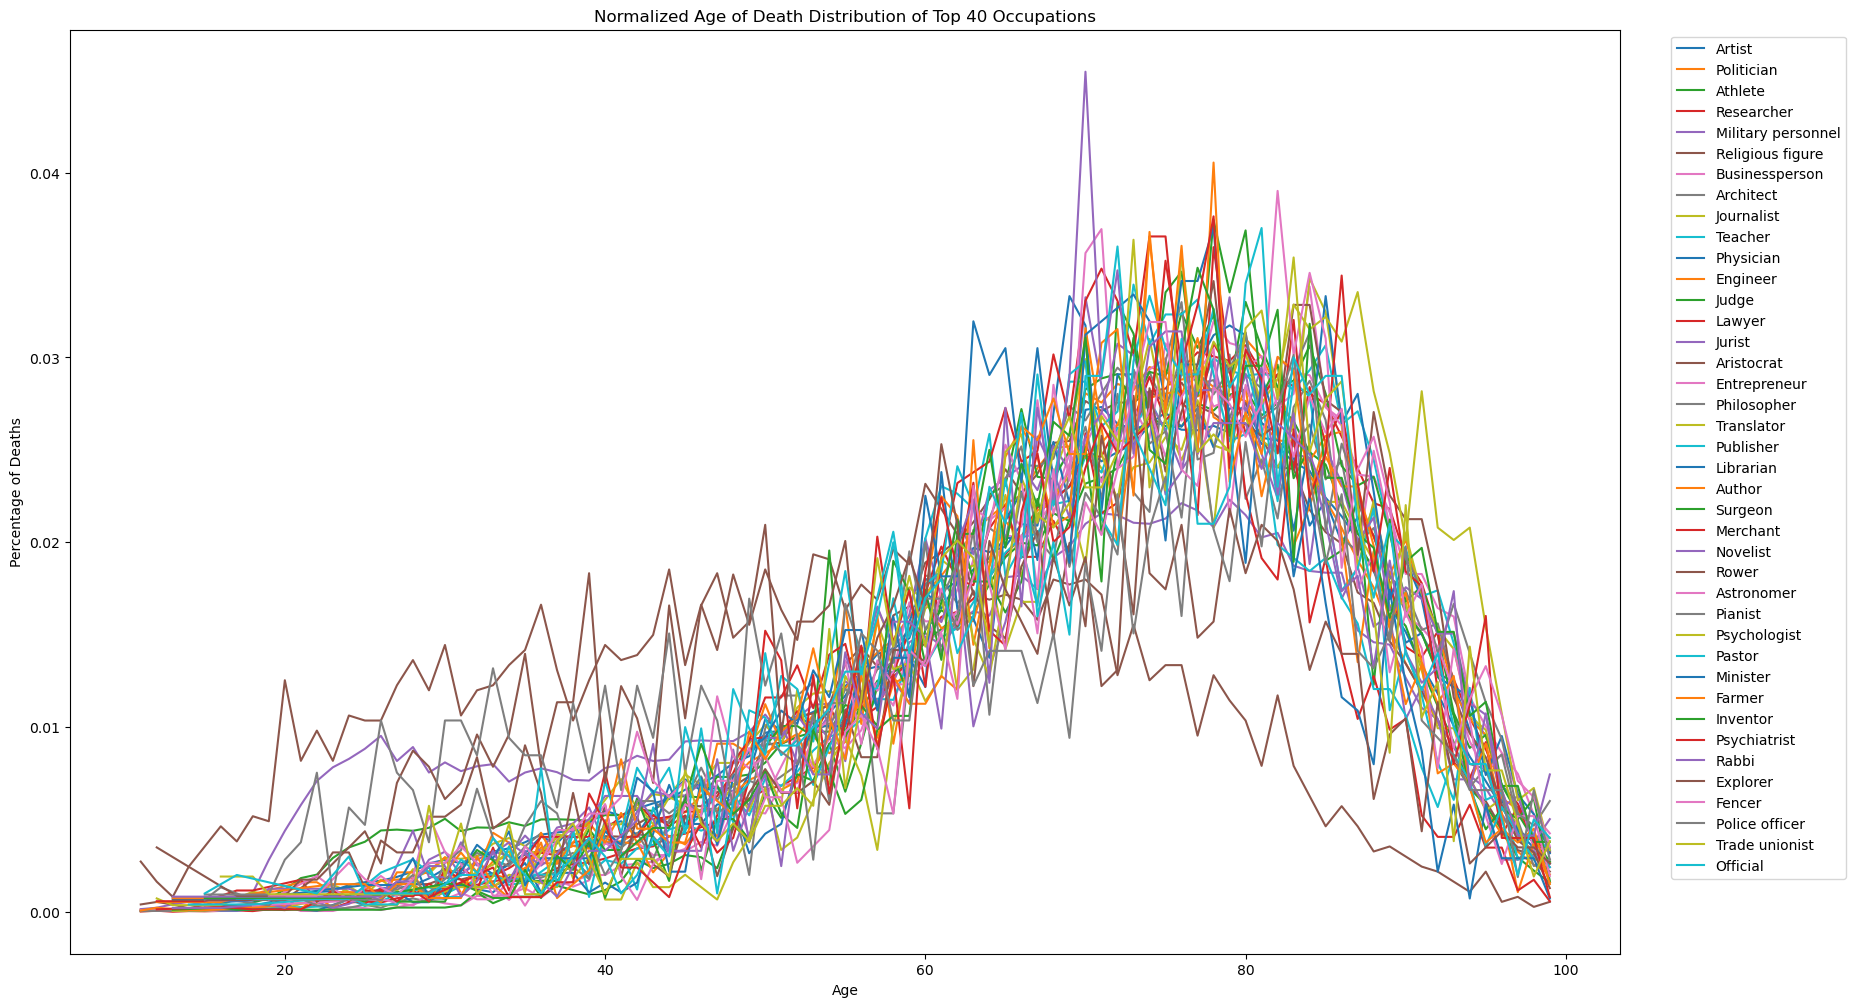

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(20, 12))
plt.title("Normalized Age of Death Distribution of Top 40 Occupations")
top_40_occupations = df['Occupation'].value_counts().nlargest(40).index.tolist()

# Pre-compute the data
precomputed_data = {}
for occupation in top_40_occupations:
    age_counts = df[df["Occupation"] == occupation]["Age of death"].value_counts().sort_index()
    total_counts = age_counts.sum()
    precomputed_data[occupation] = age_counts / total_counts


for occupation in top_40_occupations:
    plt.plot(precomputed_data[occupation], label=occupation)

plt.xlabel("Age")
plt.ylabel("Percentage of Deaths")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


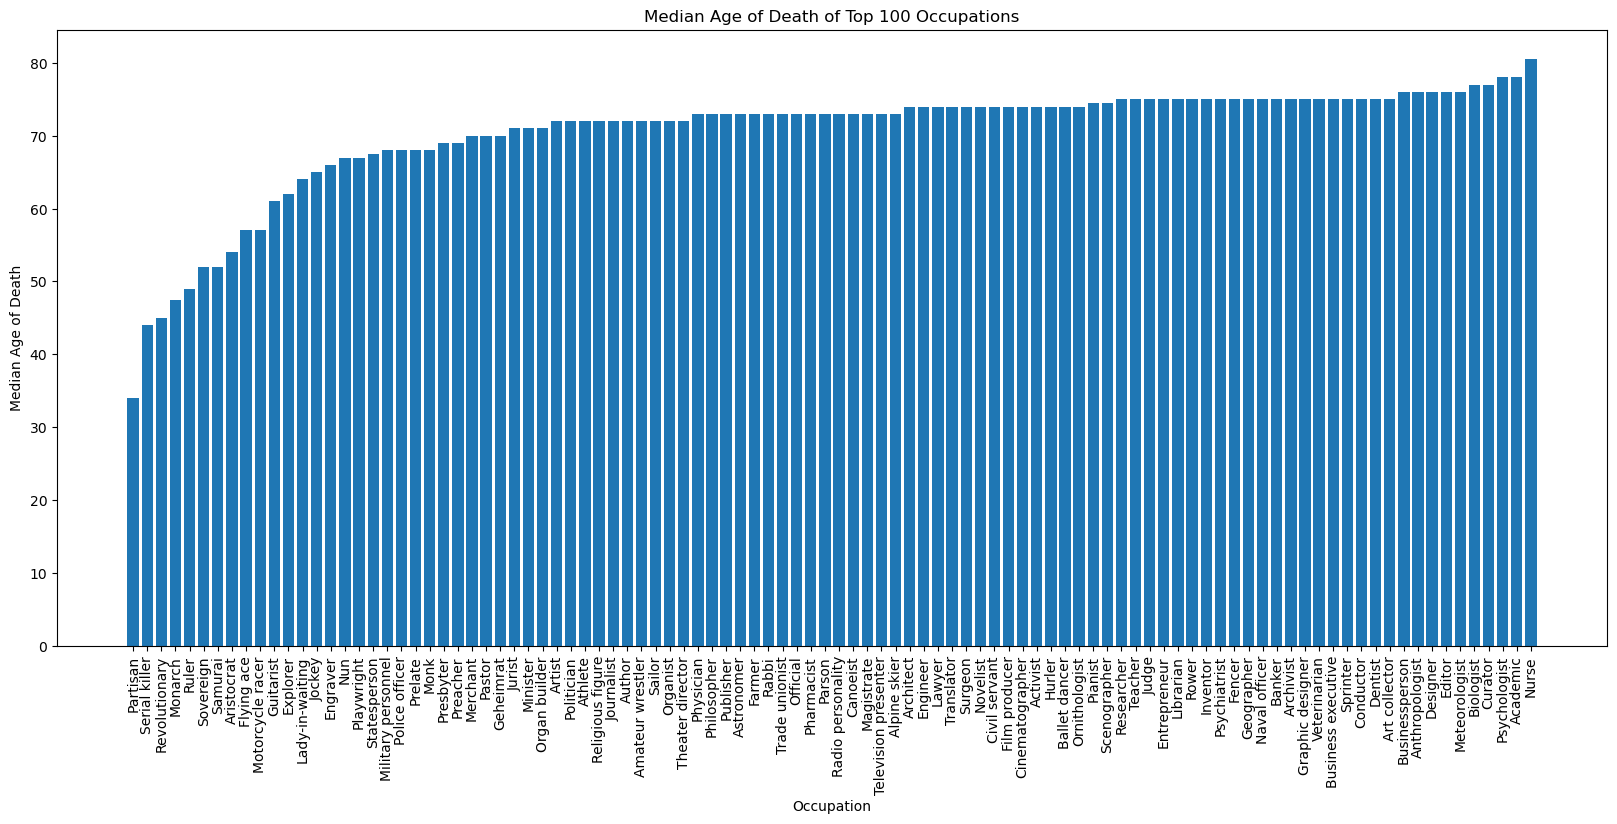

In [30]:

plt.figure(figsize=(20, 8))
plt.title("Median Age of Death of Top 100 Occupations")

# Count the occurrences of each occupation and get the top 40
top100 = df['Occupation'].value_counts().nlargest(100).index.tolist()

# Calculate the median age of death for each of the top 40 occupations
medians = {}
for occupation in top100:
    median_age = df[df["Occupation"] == occupation]["Age of death"].median()
    medians[occupation] = median_age

# Sort occupations by median age
sorted_occupations = sorted(medians, key=medians.get)

plt.bar(sorted_occupations, [medians[occupation] for occupation in sorted_occupations])
plt.xlabel("Occupation")
plt.ylabel("Median Age of Death")
plt.xticks(rotation=90)
plt.show()


We have too many occupations. if we want to get any useful/accurate insights we need a way to cluster them.

the occupation column puts people with multiple listed occupations together as a concatenated string with a ; splitting them. This will stop people who are listed with the same occupation being counted as such.

In [ ]:
print(df["Occupation"].unique())
for titles in df["Occupation"].unique():
    print(titles, "count: ", df[df["Occupation"] == titles].size)

['Politician' 'Artist' 'Egyptologist' ... 'Highwayman; manual worker'
 'Director; scout leader' 'Tailor; model']
Politician count:  2540070
Artist count:  3659656
Egyptologist count:  416
Astronomer count:  20059
Ruler count:  5824
Statesperson count:  4290
Regent count:  2015
Athlete count:  1442259
Researcher count:  1179178
Official; french resistance fighter count:  39
Sovereign count:  6422
Playwright count:  8853
Military personnel count:  687830
Philosopher count:  36647
Businessperson count:  253864
Game designer; role-playing game designer count:  26
Explorer count:  14898
Architect count:  232232
Teacher count:  203996
Activist count:  5694
Aristocrat count:  47710
Racing automobile driver count:  2730
Entrepreneur count:  38038
Motorcycle racer; formula one driver count:  221
Formula one driver count:  767
Journalist count:  208026
Geographer; explorer count:  377
Monarch count:  7540
Business executive count:  6318
Racing automobile driver; formula one driver count:  754
En

In [ ]:
print("count: ", df[df["Occupation"] == "Artist"].size)

count:  3659656


In [ ]:
#Check that